# Supervised Learning (Multiclassification Problem)

The dataset I have is multiclass dataset of crop status, which means we have 3 classes in our target variable.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset on variable name "my_data"
my_data = pd.read_excel('train_cropstatus.xlsx')
my_data.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,1,188,Feed,clay,1,0,0.0,0,1,0
1,2,209,Feed,clay,1,0,0.0,0,2,1
2,3,257,Feed,clay,1,0,0.0,0,2,1
3,4,257,Feed,silt,1,0,0.0,0,2,1
4,5,342,Feed,clay,1,0,0.0,0,2,1


`my_data.shape` return two values (80000, 10)

80000 -> Number of Rows
10    -> Number of Columns

In [3]:
# To check shape of dataset
my_data.shape

(80000, 10)

In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80000 non-null  int64  
 1   Insects                     80000 non-null  int64  
 2   Crop                        80000 non-null  object 
 3   Soil                        80000 non-null  object 
 4   Category_of_Toxicant        80000 non-null  int64  
 5   Does_count                  80000 non-null  int64  
 6   Number_of_Weeks_Used        71945 non-null  float64
 7   Number_Weeks_does_not used  80000 non-null  int64  
 8   Season                      80000 non-null  int64  
 9   Crop_status                 80000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ MB


In the above cell we can see that column name Number_of_weeks_Used having some amount of missing values as there are 71945 non null values rest are null

Now I will check the count of null values in below cell

In [5]:
my_data.isna().sum()

ID                               0
Insects                          0
Crop                             0
Soil                             0
Category_of_Toxicant             0
Does_count                       0
Number_of_Weeks_Used          8055
Number_Weeks_does_not used       0
Season                           0
Crop_status                      0
dtype: int64

There are 8055 null values in 'Number_of_Weeks_Used' column

In [6]:
my_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,80000.0,40000.500000,23094.155105,1.0,20000.75,40000.5,60000.25,80000.0
Insects,80000.0,1400.020875,849.792471,150.0,731.00,1212.0,1898.00,4097.0
Category_of_Toxicant,80000.0,2.267587,0.463748,1.0,2.00,2.0,3.00,3.0
Does_count,80000.0,25.846750,15.557246,0.0,15.00,20.0,40.00,95.0
Number_of_Weeks_Used,71945.0,28.664480,12.424751,0.0,20.00,28.0,37.00,67.0
Number_Weeks_does_not used,80000.0,9.549088,9.905547,0.0,0.00,7.0,16.00,50.0
Season,80000.0,1.897575,0.702079,1.0,1.00,2.0,2.00,3.0
Crop_status,80000.0,0.192312,0.455912,0.0,0.00,0.0,0.00,2.0


In [7]:
my_data.Number_of_Weeks_Used.fillna(my_data.Number_of_Weeks_Used.median(), inplace=True)

In [8]:
from collections import Counter
Counter(my_data.Crop_status)

Counter({0: 66716, 1: 11183, 2: 2101})

<AxesSubplot:xlabel='Insects'>

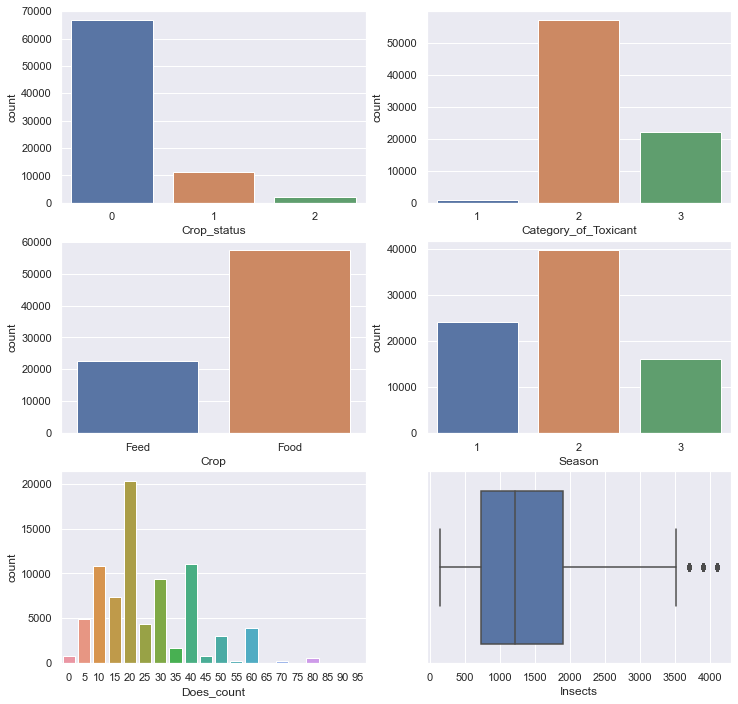

In [9]:
# Plot graph to see the distribution

plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
sns.countplot(my_data.Crop_status)

plt.subplot(3,2,2)
sns.countplot(my_data.Category_of_Toxicant)

plt.subplot(3,2,3)
sns.countplot(my_data.Crop)

plt.subplot(3,2,4)
sns.countplot(my_data.Season)

plt.subplot(3,2,5)
sns.countplot(my_data.Does_count)

plt.subplot(3,2,6)
sns.boxplot(my_data.Insects)

In [10]:
X = my_data.drop(['ID', 'Crop_status'], axis=1)
y = my_data.Crop_status
X.head()

,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season
0,188,Feed,clay,1,0,0.0,0,1
1,209,Feed,clay,1,0,0.0,0,2
2,257,Feed,clay,1,0,0.0,0,2
3,257,Feed,silt,1,0,0.0,0,2
4,342,Feed,clay,1,0,0.0,0,2


<AxesSubplot:>

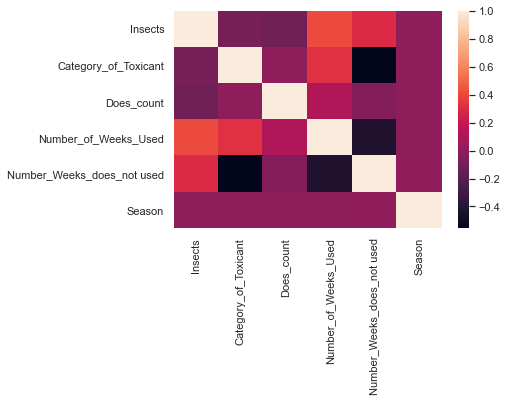

In [11]:
# Correlation matrix for attributes
sns.heatmap(X.corr())

In [12]:
X['Crop'].replace(['Food','Feed'],[0,1], inplace=True)
X['Soil'].replace(['clay','silt'],[0,1], inplace=True)
X.head()

,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season
0,188,1,0,1,0,0.0,0,1
1,209,1,0,1,0,0.0,0,2
2,257,1,0,1,0,0.0,0,2
3,257,1,1,1,0,0.0,0,2
4,342,1,0,1,0,0.0,0,2


## Using SMOTETomek (Hybrid Method)

In [13]:
from imblearn.combine import SMOTETomek
smt=SMOTETomek(sampling_strategy={0:66716, 1:13100, 2:3700},random_state=100)
X_new,y_new = smt.fit_resample(X,y)

In [14]:
Counter(y_new)

Counter({0: 63073, 1: 9843, 2: 3000})

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.20, random_state=123)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X_test.columns)

X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X_train.columns)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Logistic Regression

In [18]:
lr=LogisticRegression(multi_class='multinomial')
lr.fit(X_train,y_train)
lr_y_pred=lr.predict(X_test)
accuracy_score(y_test,lr_y_pred)

0.827054794520548

In [19]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     12589
           1       0.38      0.08      0.13      1962
           2       0.00      0.00      0.00       633

    accuracy                           0.83     15184
   macro avg       0.41      0.35      0.35     15184
weighted avg       0.74      0.83      0.77     15184



In [20]:
confusion_matrix(y_test, lr_y_pred)

array([[12404,   185,     0],
       [ 1808,   154,     0],
       [  567,    66,     0]])

## Naive Bayes

In [21]:
nb=GaussianNB()
nb.fit(X_train,y_train)
nb_y_pred=nb.predict(X_test)
accuracy_score(y_test,nb_y_pred)

0.8169783983140148

In [22]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90     12589
           1       0.37      0.21      0.26      1962
           2       0.27      0.14      0.19       633

    accuracy                           0.82     15184
   macro avg       0.50      0.43      0.45     15184
weighted avg       0.78      0.82      0.79     15184



In [23]:
confusion_matrix(y_test, nb_y_pred)

array([[11909,   564,   116],
       [ 1422,   405,   135],
       [  402,   140,    91]])

## Support Vector Machine (SVM)

In [24]:
svm=SVC(kernel='linear',C=1)
svm.fit(X_train,y_train)
svm_y_pred=svm.predict(X_test)
accuracy_score(y_test,svm_y_pred)

0.8290964172813488

In [25]:
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     12589
           1       0.00      0.00      0.00      1962
           2       0.00      0.00      0.00       633

    accuracy                           0.83     15184
   macro avg       0.28      0.33      0.30     15184
weighted avg       0.69      0.83      0.75     15184



In [26]:
confusion_matrix(y_test, svm_y_pred)

array([[12589,     0,     0],
       [ 1962,     0,     0],
       [  633,     0,     0]])

## XGBoost

In [27]:
xgb=XGBClassifier(learning_rate=0.1,max_depth=6,min_child_weight=1,gamma=0.2,scale_pos_weight = 1)
xgb.fit(X_train,y_train)
xgb_y_pred=xgb.predict(X_test)
accuracy_score(y_test,xgb_y_pred)

[15:13:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:13:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8539910432033719

In [28]:
print(classification_report(y_test, xgb_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     12589
           1       0.54      0.29      0.37      1962
           2       0.75      0.06      0.12       633

    accuracy                           0.85     15184
   macro avg       0.72      0.44      0.47     15184
weighted avg       0.83      0.85      0.82     15184



In [29]:
confusion_matrix(y_test, xgb_y_pred)

array([[12366,   220,     3],
       [ 1391,   560,    11],
       [  342,   250,    41]])

## Test Data

In [30]:
td = pd.read_excel("test_cropstatus.xlsx")
test_data = td.copy()
test_data.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season
0,1,188,Feed,silt,1,0,NaN,0,2
1,2,410,Feed,silt,1,0,0.0,0,2
2,3,626,Feed,clay,1,0,0.0,0,2
3,4,731,Feed,clay,1,0,0.0,0,2
4,5,789,Food,clay,1,0,0.0,0,1


In [31]:
test_data.shape

(35000, 9)

In [32]:
test_data.isna().sum()

ID                               0
Insects                          0
Crop                             0
Soil                             0
Category_of_Toxicant             0
Does_count                       0
Number_of_Weeks_Used          3542
Number_Weeks_does_not used       0
Season                           0
dtype: int64

In [33]:
test_data['Number_of_Weeks_Used'].fillna(test_data['Number_of_Weeks_Used'].median(),inplace=True)

In [34]:
test_data['Crop'].replace(['Food','Feed'],[0,1], inplace=True)
test_data['Soil'].replace(['clay','silt'],[0,1],inplace=True)

In [35]:
test_data.drop(['ID'], axis=1, inplace=True)

In [36]:
pred_test=xgb.predict(test_data)
output = pd.DataFrame({'ID': td.ID, 'Crop_status': pred_test})

output.to_csv('final_submission.csv', index=False)